In [14]:
using TestImages
using Images
using LinearAlgebra
using StatsBase

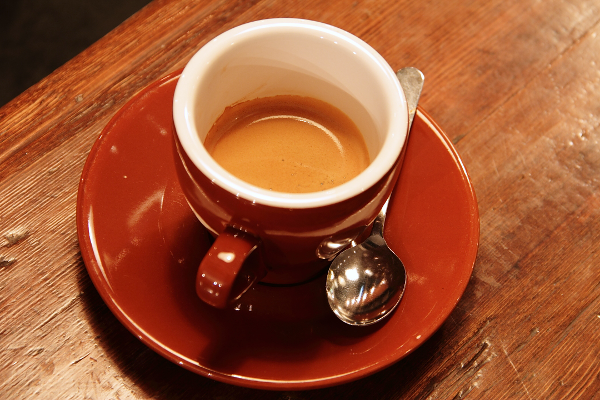

In [15]:
image = testimage("coffee.png")

In [16]:
function image_to_matrix(image)
    n, m = size(image)
    M = zeros(n, m, 3)
    for i in range(1, n)
        for j in range(1, m)
            color = image[i, j]
            M[i, j, 1] = Int.(floor(255*color.r))
            M[i, j, 2] = Int.(floor(255*color.g))
            M[i, j, 3] = Int.(floor.(255*color.b))
        end
    end
    return M
end

image_to_matrix (generic function with 1 method)

In [17]:
M = image_to_matrix(image);
clip(x) = x < 0. ? 0. : x > 255. ? 255. : x

clip (generic function with 1 method)

In [18]:
function find_PCA(X, num_components)
    n = size(X)[2]
    Xₘₑₐₙ = mean(X, dims=2)
    Y = X .- Xₘₑₐₙ
    Cov = X*X' /(n - 1)
    Λ, E = eigen(Cov)
    P̂ = E[:, end-num_components+1:end]
    X̂ = P̂*P̂' *Y .+ Xₘₑₐₙ
    return X̂
end

find_PCA (generic function with 1 method)

In [19]:
function compress_image(image, num_components=1)
    M = image_to_matrix(image)
    M̂ = zeros(size(M))
    for channel in range(1, 3)
        M̂[:, :, channel] = find_PCA(M[:, :, channel], num_components)
    end
    return clip.(M̂)
end

compress_image (generic function with 2 methods)

In [20]:
cimage15 = compress_image(image, 15);

In [21]:
function to_rgb(cimage)
    m, n, c = size(cimage)
    image = [RGB(cimage[i, j, 1]/255, cimage[i, j, 2]/255, cimage[i, j, 3]/255) for i in 1:m, j in 1:n]
    return image
end

to_rgb (generic function with 1 method)

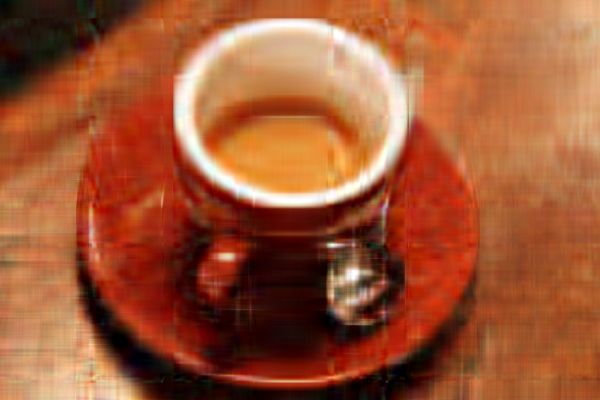

In [22]:
cimage15 |> to_rgb

In [23]:
cimage50 = compress_image(image, 50);

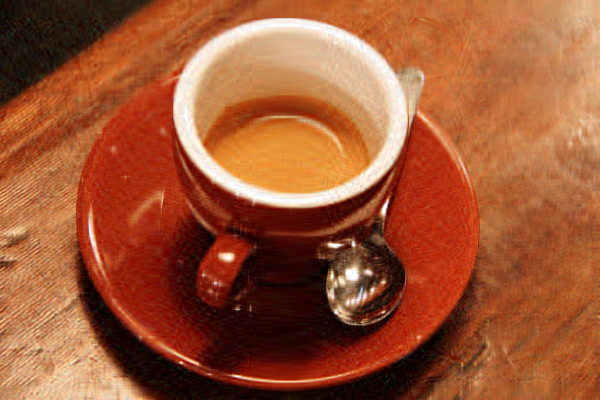

In [24]:
cimage50 |> to_rgb

In [25]:
cimage200 = compress_image(image, 200);

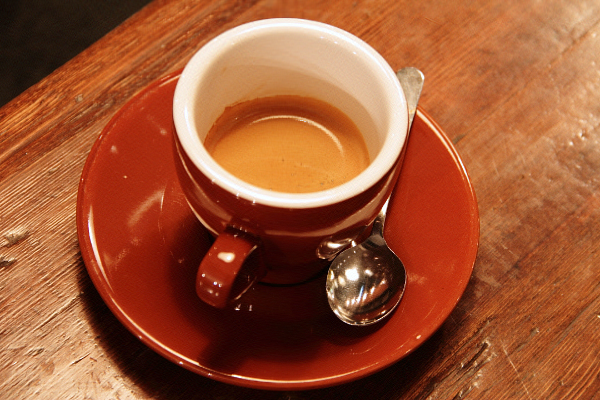

In [26]:
cimage200 |> to_rgb